In [1]:
%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt
import pylib.qsvt_angles as qsvt_a

6774
/media/work/docs/codes/QuCF/scripts-py


In [2]:
path_save_plots_ = "./tools/QSVT-angles/inversion/saved-plots/"
for i in range(30):
    plt.close()

In [5]:
# ----------------------------------------------------------------------------------
# --- Read the parameters for the estimation of the QSVT angles ---
# ----------------------------------------------------------------------------------
mix.reload_module(eqsvt)

# --- Reference case: id_case_, N_coefs_ = 8, 20 ---
id_case_, N_coefs_ = 8, 20

# read estimation parameters:
dd_ = eqsvt.read_estimation(id_case_, N_coefs_)

Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case8-Nc20.hdf5
When simulated:  07/21/2024: 16:15:52
Data: for-inversion

kappa-reference: 650.000
factor-norm: 0.125
Na-ref: 23520
N-coefs-envelope-neg: 20
N-coefs-envelope-pos: 20


In [27]:
# ------------------------------------------------------------------------
# --- Target condition number for each QSVT angles should be estimated ---
# ------------------------------------------------------------------------
kappa_goal_ = int(1e6)

flag_variation_ = False

In [28]:
# --------------------------------------------------------
# --- Estimating QSVT angles ---
# --------------------------------------------------------
import time
mix.reload_module(eqsvt)

start = time.time()

if not flag_variation_:
    phis_appr_, coef_norm_ = eqsvt.estimate_angles(
        dd_, kappa_goal_, 
        flag_variation = False
    )
else:
    phis_appr_, coef_norm_ = \
        eqsvt.estimate_angles(
            dd_, kappa_goal_, 
            flag_variation = True,
            # ---
            N_iter_Na = 20,
            dN_env = int(kappa_goal_ / 10.),
            # ---
            N_iter_c = 0,
            coef_dc_init = 0.2
        )
    
end = time.time()
length = end - start
print("calc. time: {:0.3e} s".format(length))
del start, end, length

--- Standard estimation of the QSVT angles. ---
kappa-target: 1.000e+06

--- Estimating the number of QSVT angles... ---
Done.

--- Reproducing the angles' shape ... ---
Done.

--- Reconstructing the angles ... ---
Done.
Na: 36184616
Done.
calc. time: 6.678e+02 s


In [3]:
# ---------------------------------------------------------------------
# --- Scaling: computation time versus condition number ---
# ---------------------------------------------------------------------
def scan_time_kappa():
    kappa_arr = [1e3, 5e3, 1e4,       2e4,       5e4,       1e5,       2e5,       5e5,       1e6]
    time_arr  = [0.7, 3.4, 6.8, 1.351e+01, 3.414e+01, 6.826e+01, 1.345e+02, 3.390e+02, 6.678e+02]

    mix.save_dat_plot_1d_file(
        path_save_plots_ + "/Scaling_time_kappa.dat", 
        # k__array, np.log10(err_array)
        kappa_arr, time_arr
    )

    return
# --------------------------------------------------------
scan_time_kappa()

write data to a file: ./tools/QSVT-angles/inversion/saved-plots//Scaling_time_kappa.dat


In [8]:
# ----------------------------------------------------------------
# --- SAVE the QSVT angles to .hdf5 file ---
# ----------------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.save_estimated_angles(
    kappa_goal_, dd_, phis_appr_, id_case_, N_coefs_, 
    flag_variation = flag_variation_
)

write angles to:
 ./tools/QSVT-angles/inversion/estimated-angles//est_mi_k6.0e5_ref8_Nc20.hdf5
Done.


1/kappa: 2.000e-03
kappa: 500.0
Na: 18092
max-abs-err: 4.643e-06


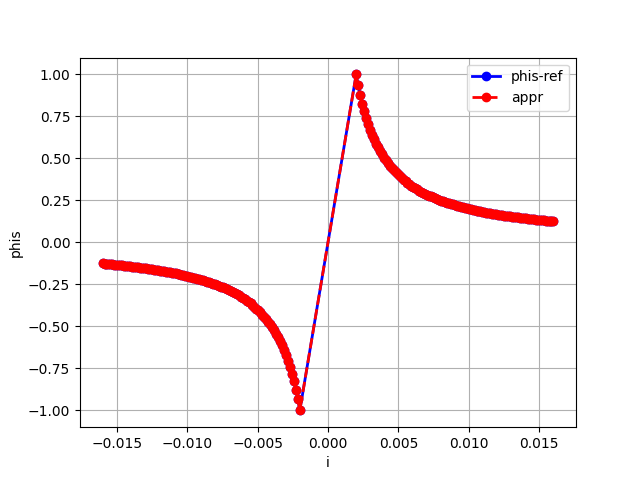

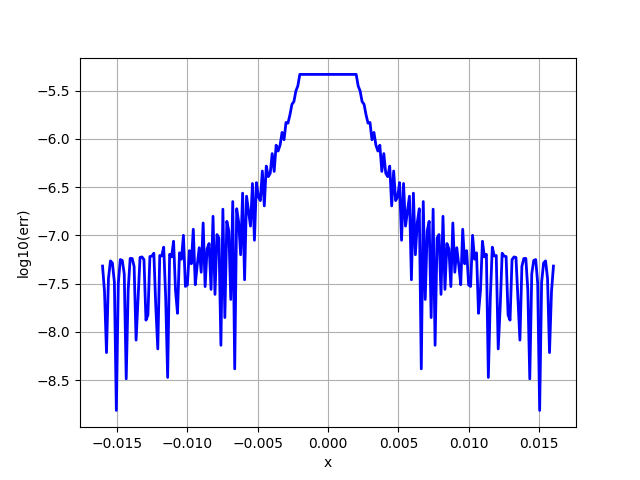

Done.


In [7]:
# ---------------------------------------------------------------------------------
# --- RECHECK: Compute the inverse function using the sequence of 2x2 rotations ---
# ---------------------------------------------------------------------------------
mix.reload_module(eqsvt)

print("1/kappa: {:0.3e}".format(1./kappa_goal_))
eqsvt.construct_inverse_function_GPU(
    phis_in = np.array(phis_appr_),
    kappa     = kappa_goal_, 
    coef_norm = coef_norm_,
    opt_domain = 2
)
print("Done.")